# TIME SERIES ANALYSIS

## Goal: Find outliers, trends and periodicity in the MTA turnstile data

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.api as sm

import seaborn

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# read in the turnstile data
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape

(600, 23, 194)

In [3]:
# create ridetype array
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

MTA turnstile data has -1 for missing values. Let's replace those with NaNs.

In [4]:
mtaRides = mtaRides.astype(float)
mtaRides[mtaRides == -1] = NaN

dates = pd.date_range(start = '06/04/2010', end = '02/14/2014', freq = '7D')
byStation = np.nansum(mtaRides,axis = 1)

Figure 1: Total number of weekly rides from each of 600 Manhattan subway stops between 5/21/2010 and 2/14/2014. The plot is messy but there are some clear events worth investigating. 

## Event Detection: 

Difference the series and identify the largest changes

In [5]:
# take the differnce of total ridership in millions
diffsTot = np.diff(np.nansum(byStation, axis = 0))/1000000
meandiff = np.nanmean(diffsTot)
stddiff = np.std(diffsTot)

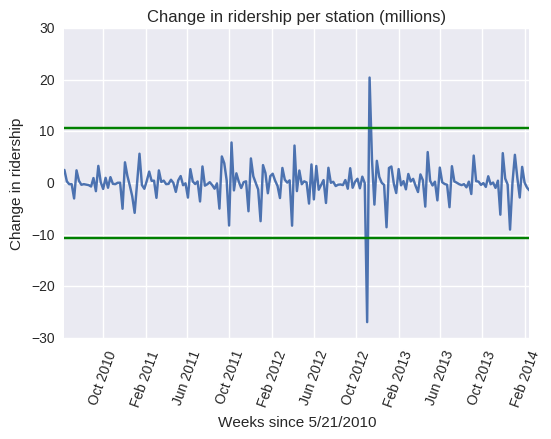

In [6]:
# plot the total changes
plot(dates[1:], diffsTot)

# plot the 3 sigma levels
plot(dates[1:], [meandiff + 3 * stddiff for i in range(len(dates[1:]))], c = 'green')
plot(dates[1:], [meandiff - 3 * stddiff for i in range(len(dates[1:]))], c = 'green')

# plot formatting
pl.xticks(rotation=70)
pl.xlabel('Weeks since 5/21/2010')
pl.ylabel('Change in ridership')
pl.title('Change in ridership per station (millions)')


Figure 2: Total change in weekly ridership of the subway and lines for three standard deviation events. The major event in October 2012 is from Hurricane Sandy.

In [7]:
events = dates[np.where((diffsTot < (meandiff - 3 * stddiff)) | (diffsTot > (meandiff + 3 * stddiff)))]

print('The major events occur {:%m/%d/%Y} and {:%m/%d/%Y}'.format(events[0], events[1]))
print('The first event major change is Hurricane Sandy. The other is the recovery from it.')

The major events occur 10/26/2012 and 11/02/2012
The first event major change is Hurricane Sandy. The other is the recovery from it.


## Stationarity Detection:

Which ridership types have increase/decreased/etc? 

In [8]:
types = np.nansum(mtaRides, axis = 0)

typeRatios = types / np.nansum(types, axis = 0)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version


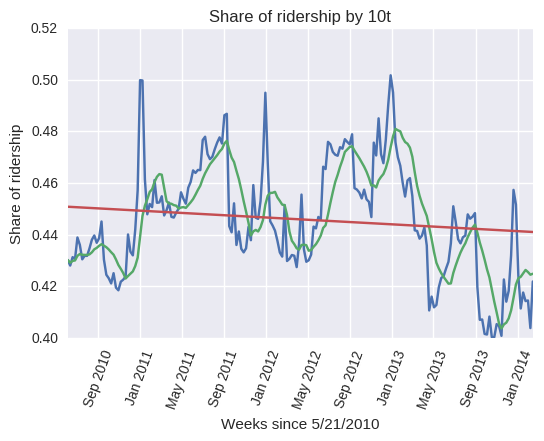

Figure 3: The ratio of 10t ridership at the end of the period relative to the start is 0.98. The R2 value for the regression modeling the ratio on time is 0.02. We cannot detect a trend due to a structural break or periodicity.


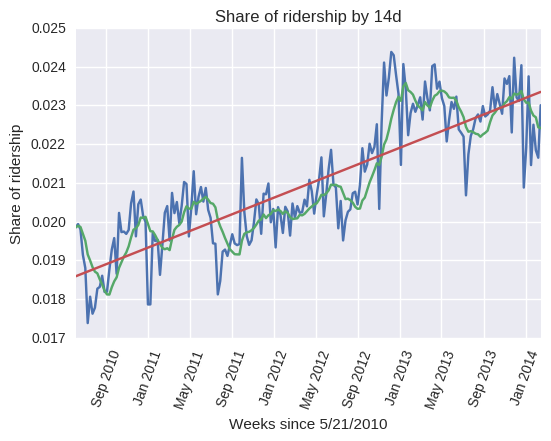

Figure 4: The ratio of 14d ridership at the end of the period relative to the start is 1.2. The R2 value for the regression modeling the ratio on time is 0.81. This is implies there is a positive time trend.


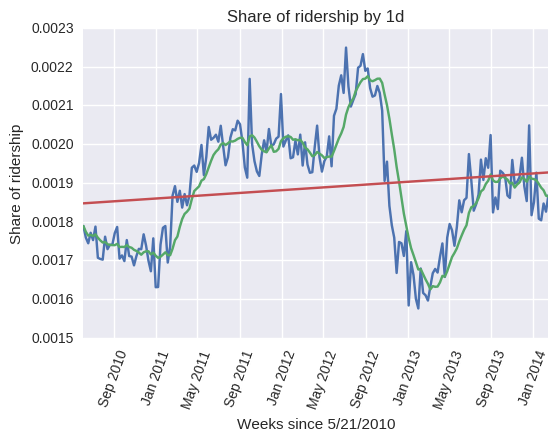

Figure 5: The ratio of 1d ridership at the end of the period relative to the start is 1.1. The R2 value for the regression modeling the ratio on time is 0.03. We cannot detect a trend due to a structural break or periodicity.


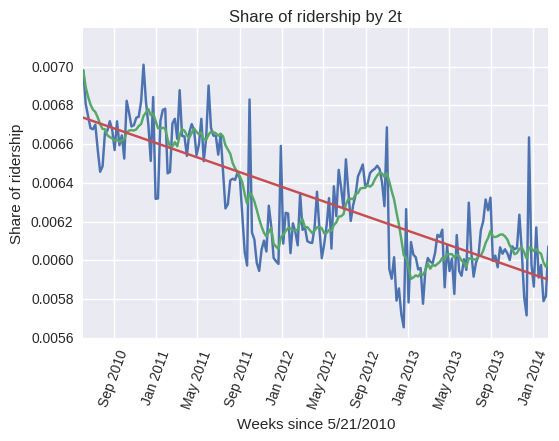

Figure 6: The ratio of 2t ridership at the end of the period relative to the start is 0.9. The R2 value for the regression modeling the ratio on time is 0.76. This is implies there is a negative time trend.


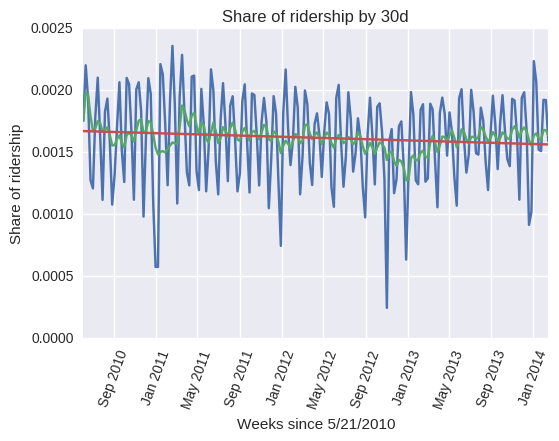

Figure 7: The ratio of 30d ridership at the end of the period relative to the start is 0.97. The R2 value for the regression modeling the ratio on time is 0.10. We cannot detect a trend due to a structural break or periodicity.


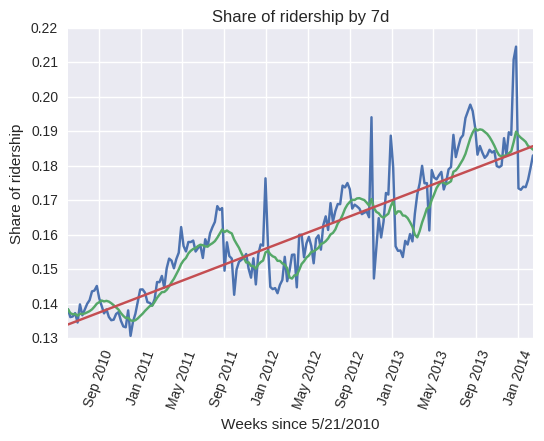

Figure 8: The ratio of 7d ridership at the end of the period relative to the start is 1.3. The R2 value for the regression modeling the ratio on time is 0.88. This is implies there is a positive time trend.


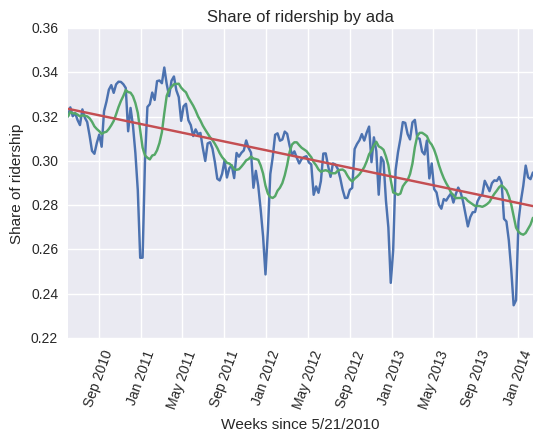

Figure 9: The ratio of ada ridership at the end of the period relative to the start is 0.86. The R2 value for the regression modeling the ratio on time is 0.63. This is implies there is a negative time trend.


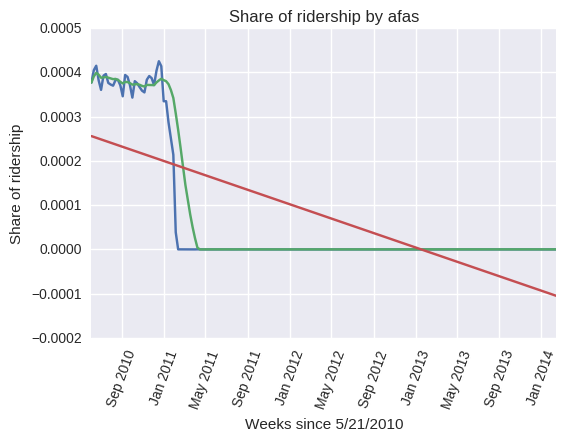

Figure 10: The ratio of afas ridership at the end of the period relative to the start is 0.0002. The R2 value for the regression modeling the ratio on time is 0.51. We cannot detect a trend due to a structural break or periodicity.


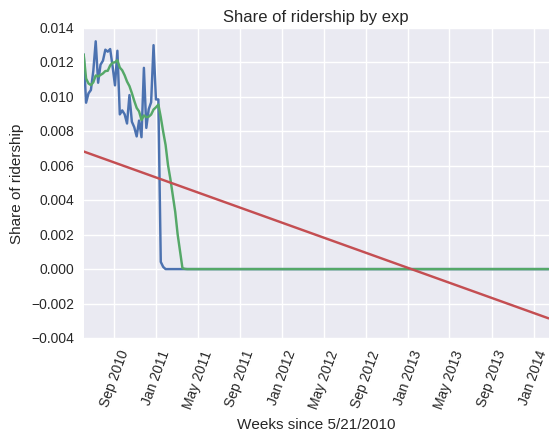

Figure 11: The ratio of exp ridership at the end of the period relative to the start is 1e-05. The R2 value for the regression modeling the ratio on time is 0.49. We cannot detect a trend due to a structural break or periodicity.


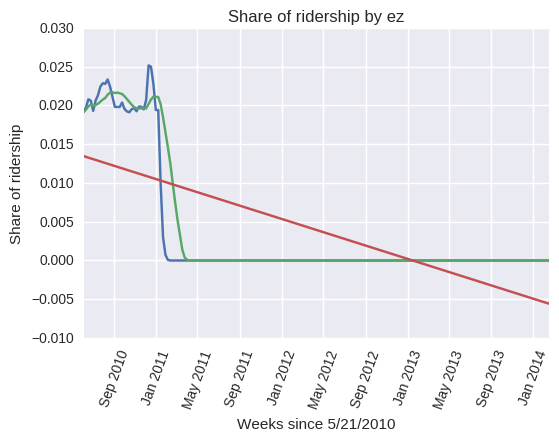

Figure 12: The ratio of ez ridership at the end of the period relative to the start is 1.5e-06. The R2 value for the regression modeling the ratio on time is 0.49. We cannot detect a trend due to a structural break or periodicity.


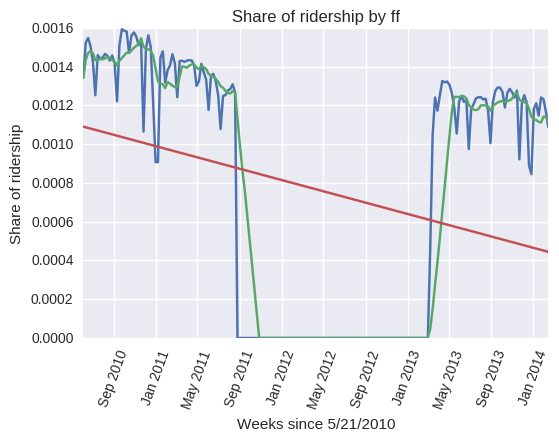

Figure 13: The ratio of ff ridership at the end of the period relative to the start is 0.78. The R2 value for the regression modeling the ratio on time is 0.09. We cannot detect a trend due to a structural break or periodicity.


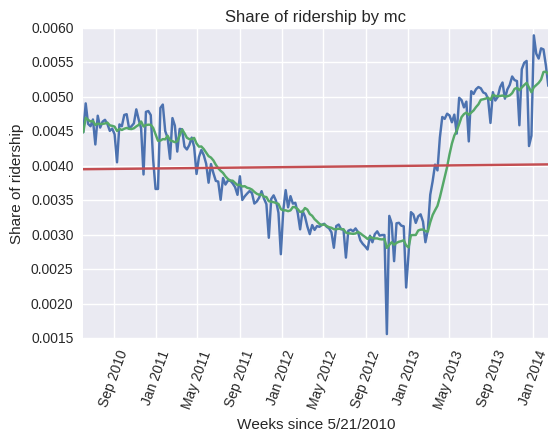

Figure 14: The ratio of mc ridership at the end of the period relative to the start is 1.2. The R2 value for the regression modeling the ratio on time is 0.00. We cannot detect a trend due to a structural break or periodicity.


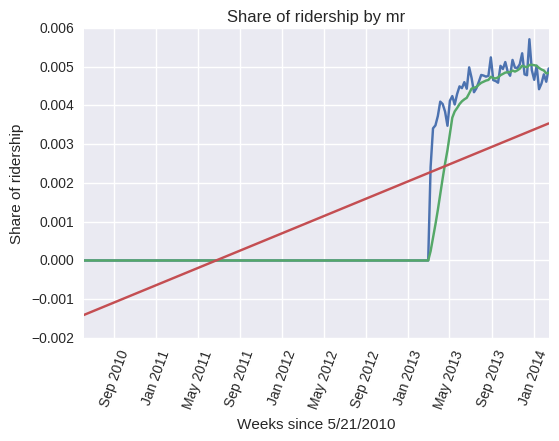

Figure 15: The ratio of mr ridership at the end of the period relative to the start is 2.4e+04. The R2 value for the regression modeling the ratio on time is 0.56. We cannot detect a trend due to a structural break or periodicity.


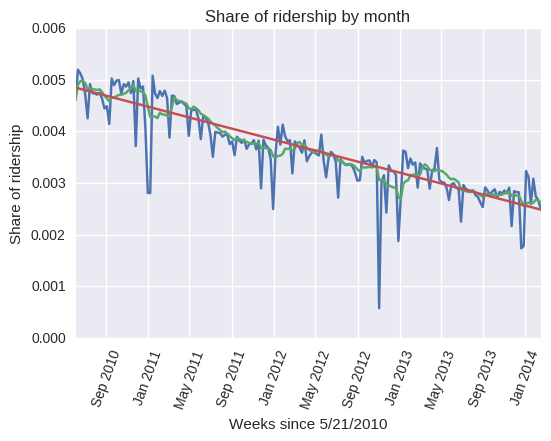

Figure 16: The ratio of month ridership at the end of the period relative to the start is 0.55. The R2 value for the regression modeling the ratio on time is 0.95. This is implies there is a negative time trend.


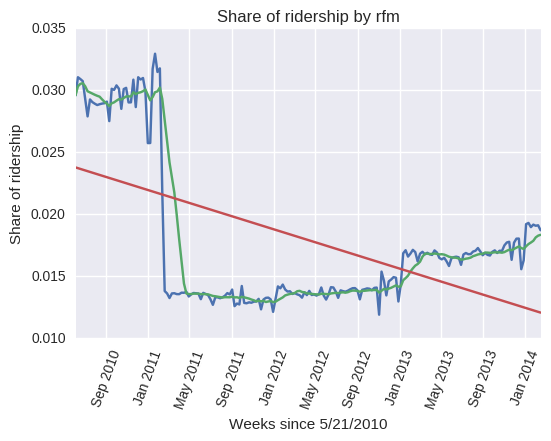

Figure 17: The ratio of rfm ridership at the end of the period relative to the start is 0.62. The R2 value for the regression modeling the ratio on time is 0.31. We cannot detect a trend due to a structural break or periodicity.


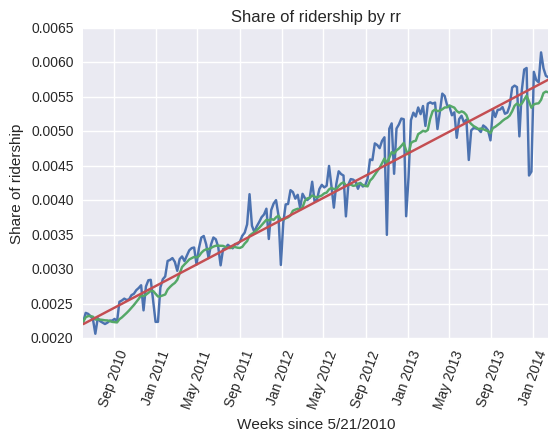

Figure 18: The ratio of rr ridership at the end of the period relative to the start is 2.5. The R2 value for the regression modeling the ratio on time is 0.98. This is implies there is a positive time trend.


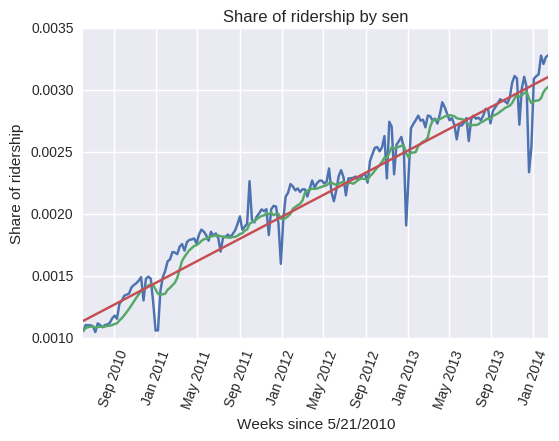

Figure 19: The ratio of sen ridership at the end of the period relative to the start is 2.8. The R2 value for the regression modeling the ratio on time is 0.98. This is implies there is a positive time trend.


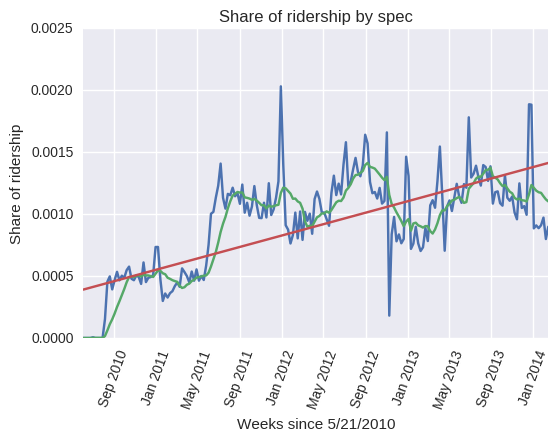

Figure 20: The ratio of spec ridership at the end of the period relative to the start is 6.9e+01. The R2 value for the regression modeling the ratio on time is 0.62. This is implies there is a positive time trend.


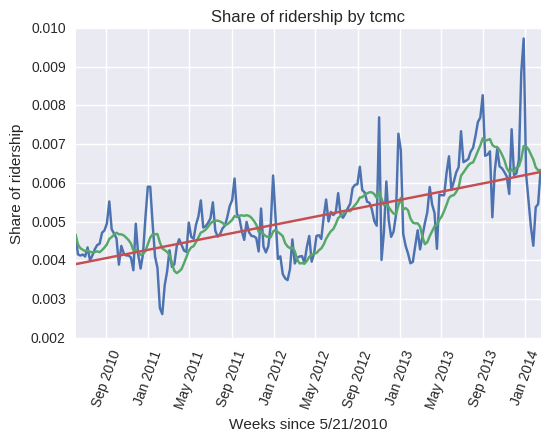

Figure 21: The ratio of tcmc ridership at the end of the period relative to the start is 1.5. The R2 value for the regression modeling the ratio on time is 0.63. This is implies there is a positive time trend.


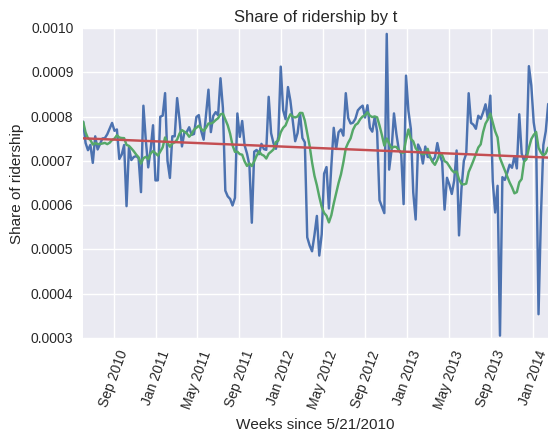

Figure 22: The ratio of t ridership at the end of the period relative to the start is 0.99. The R2 value for the regression modeling the ratio on time is 0.06. We cannot detect a trend due to a structural break or periodicity.


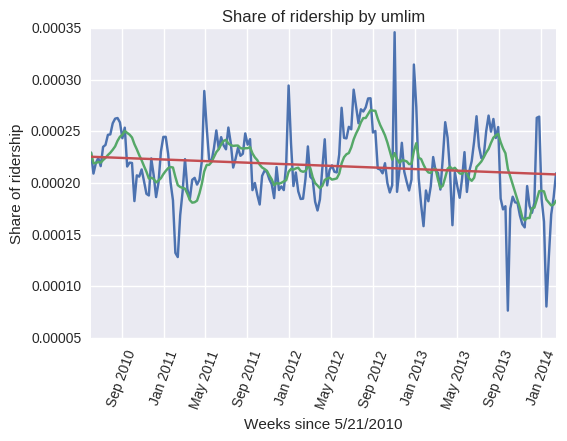

Figure 23: The ratio of umlim ridership at the end of the period relative to the start is 0.79. The R2 value for the regression modeling the ratio on time is 0.05. We cannot detect a trend due to a structural break or periodicity.


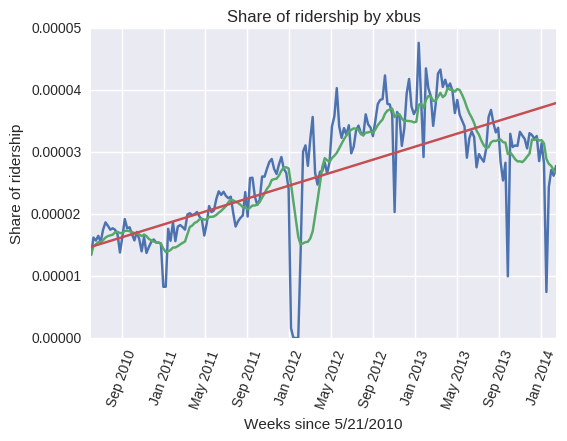

Figure 24: The ratio of xbus ridership at the end of the period relative to the start is 1.6. The R2 value for the regression modeling the ratio on time is 0.67. This is implies there is a positive time trend.


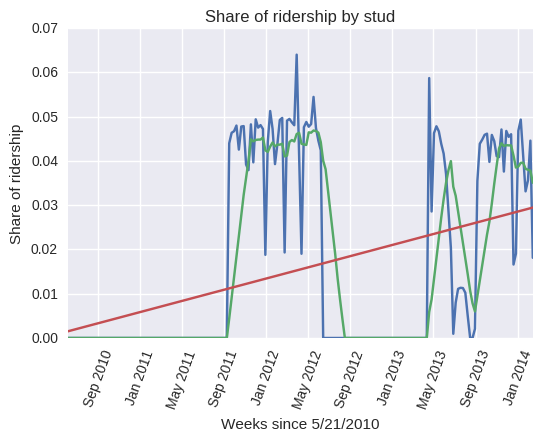

Figure 25: The ratio of stud ridership at the end of the period relative to the start is inf. The R2 value for the regression modeling the ratio on time is 0.19. We cannot detect a trend due to a structural break or periodicity.


 The steepest increase is spec with 69.4273925094 and the steepest decrease is month with 0.547787931955


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [9]:
ratios = []
contenders = []
for rt in range(len(ridetype)):

    # calculate ratio of final ridership to begining ridership
    ratio = np.nansum(typeRatios[rt][-10:]) / np.nansum(typeRatios[rt][:10])

    
    # regression
    timetrendmodel = sm.OLS(endog = pd.rolling_mean(typeRatios[rt], window = 10, min_periods = 0),
                            exog = sm.add_constant(range(len(typeRatios[rt])))).fit()
    
    plot(dates, typeRatios[rt])
    plot(dates, pd.rolling_mean(typeRatios[rt], window = 10, min_periods = 0))
    plot(dates, timetrendmodel.predict())
    pl.xticks(rotation=70)
    pl.xlabel('Weeks since 5/21/2010')
    pl.ylabel('Share of ridership')
    pl.title('Share of ridership by {}'.format(ridetype[rt]))
    
    plt.show()
    
    if timetrendmodel.rsquared > .6:
        # keep track of ratios to later find steepest
        ratios.append(ratio)
        contenders.append(ridetype[rt])
        if ratio > 1:
            conclusion = 'This is implies there is a positive time trend.'
        if ratio < 1: 
            conclusion = 'This is implies there is a negative time trend.'
    else:
        conclusion = 'We cannot detect a trend due to a structural break or periodicity.'
    
    print('Figure {}: The ratio of {} ridership at the end of the period relative to the start is {:.2}. \
The R2 value for the regression modeling the ratio on time is {:.2f}. '\
          .format(rt + 3, ridetype[rt], ratio, timetrendmodel.rsquared) + conclusion)
    
print '\n\n The steepest increase is {} with {} and the steepest decrease is {} with {}'\
    .format(contenders[np.where(ratios == np.nanmax(ratios))[0]], max(ratios), contenders[np.where(ratios == np.nanmin(ratios))[0]], min(ratios))


## Identify Periodicity by station

In [10]:
# period we're interested in

p = 194. / 52
p

3.730769230769231

In [11]:
# find power for each station at 4 frequency
powers = [abs(np.fft.rfft(byStation[i]))[4] for i in range(600)]

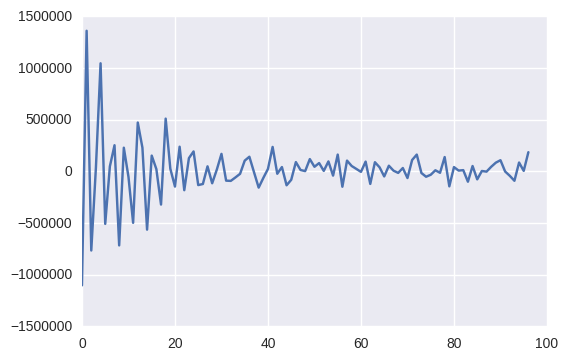

In [18]:
plot(np.fft.rfft(byStation[0])[1:])

In [12]:
powers_top = sorted(powers, reverse = True)[:4]

locations = np.where(np.in1d(powers, powers_top))

print('The stations with maximum annual periodic behavior are {}, {}, {}, and {}.'.\
      format(locations[0][0], locations[0][1], locations[0][2], locations[0][3]))

The stations with maximum annual periodic behavior are 0, 150, 194, and 327.


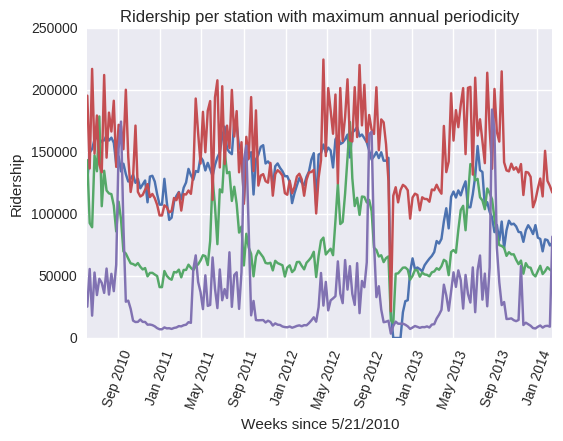

In [13]:
for i in locations[0]:
    plot(dates, byStation[i])
    # plot formatting
pl.xticks(rotation=70)
pl.xlabel('Weeks since 5/21/2010')
pl.ylabel('Ridership')
pl.title('Ridership per station with maximum annual periodicity')

Figure 26: Weekly ridership for per station for the four stations with highest annual periodicity. We don't have names to confirm but I believe the purple line represents Shea Stadium. There is higher ridership during the summer when the Mets are playing their home games and there is a spike at the end of August during the US Tennis Open. The red line is likely Yankee Stadium as it has the same seasonality as the purple line but does not host a major tennis tournament. I suspect the green line is Coney Island as it also peaks during the Summer months. I'm the least confident in the Blue line but I think it is Bowling Green. It appears to be in lower Manhattan as it had a slow recovery from Sandy. And it peaks in the Summer as there are more people commuting via the Staten Island Ferry. 

## Extra Credit: Clustering